In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# pip install graphviz


The following command must be run outside of the IPython shell:

    $ pip install graphviz

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:

from graphviz import Source
# from python-graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

NameError: name 'pd' is not defined

In [4]:
# инициализируем классификатор с критерием - энтропия
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

NameError: name 'data' is not defined

In [26]:
# обучаем классификатор
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
#визуализируем дерево (не сработало)
tree.plot_tree(clf.fit(X, y));

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [6]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# titanic_data.isna().sum()

In [8]:
# преобразуем датасет для классификации
X = titanic_data.drop(['PassengerId', 
                      'Survived',
                      'Name',
                      'Ticket',
                      'Cabin'], axis=1)
y = titanic_data.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
#преобразуем качественные переменые в бинарную матрицу
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
#заполняем NaN значения: медиана или восстановить через регрессию
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
# обучаем классификатор
clf.fit(X, y)
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [33]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# визуализируем дерево
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                    feature_names=list(X), 
                                    class_names = ['Died', 'Survived'], 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'Source' is not defined

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
# импортируем библиотеку для разбивки выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split

In [13]:
# разбиваем выборку в пропорции 0,67/0,33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [38]:
# проверяем разбивку
X_train.shape

(596, 10)

In [39]:
# проверяем разбивку
X_test.shape

(295, 10)

In [40]:
# обучим классификатор на тренировочных данных
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
# точность классификации на обучающем множестве
clf.score(X_train, y_train)

0.9798657718120806

In [42]:
# точность классификации на тестовом множестве
clf.score(X_test, y_test)

0.7694915254237288

In [43]:
# обрежем дерево, установим глубину дерева max_depth
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
clf.score(X_train, y_train)

0.8238255033557047

In [45]:
clf.score(X_test, y_test)

0.8203389830508474

In [56]:
# зададим глубине дерева диапазон
max_depth_values = range(1, 100)

# создадим пустой датафрейм для накопления данных
scores_data = pd.DataFrame()

# итерируемся 100 раз в разной глубиной дерева
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_data = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [train_score], 
        'test_score': [test_score], 
        'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(temp_data)

In [57]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [59]:
# преобразуем (расплавим) таблицу для визуализации
score_data_long = pd.melt(scores_data, 
                          id_vars=['max_depth'], 
                          value_vars=['train_score', 'test_score', 'cross_val_score'], 
                          var_name='set_type', 
                          value_name='score'
                         )

In [60]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


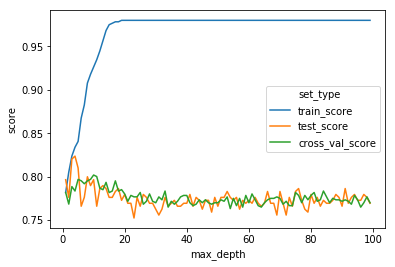

In [61]:
# построим график
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long)

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [55]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7835799743626264

In [14]:
# библиотека для подбора параметров
from sklearn.model_selection import GridSearchCV

In [15]:
clf = tree.DecisionTreeClassifier()

In [16]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth': range(1,30)}

In [17]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)

In [18]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
# лучшие параметры
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [21]:
# сохраним лучшее дерево со ВСЕМИ параметрами
best_clf = grid_search_cv_clf.best_estimator_

In [22]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# импорт библиотеки для оценки качества
from sklearn.metrics import precision_score, recall_score

In [32]:
y_pred = best_clf.predict(X_test)

In [6]:
# бинарное предсказание
y_pred

NameError: name 'y_pred' is not defined

In [26]:
precision_score(y_test, y_pred) 

0.8369565217391305

In [27]:
recall_score(y_test, y_pred) 

0.6416666666666667

In [28]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [5]:
# предсказывается вероятность к отрицательному или положительному классу
# по умолчанию конвертация в бинарный вид по отсечке 0,5
y_predicted_prob

NameError: name 'y_predicted_prob' is not defined

In [4]:
# выберем вторую колонку и построим гистограмму
pd.Series(y_predicted_prob[:, 1]).hist()

NameError: name 'pd' is not defined

In [3]:
# предположим новую отсечку для бинарного рапределения вероятностей
y_pred_new = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

NameError: name 'np' is not defined

In [2]:
precision_score(y_test, y_pred_new) 

NameError: name 'precision_score' is not defined

In [ ]:
# построение ROC кривой

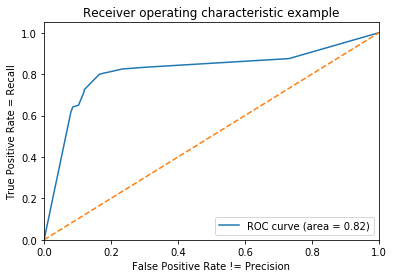

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate != Precision')
plt.ylabel('True Positive Rate = Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()